In [1]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
#from clickhouse_driver.client import Client

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
data = "datasets/stock_data.csv"
df = pd.read_csv(data, parse_dates=True)
df.head(10)

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA
5,1/10/2006,42.96,43.34,42.34,42.98,16288580,AABA
6,1/11/2006,42.19,42.31,41.72,41.87,26192772,AABA
7,1/12/2006,41.92,41.99,40.76,40.89,18921686,AABA
8,1/13/2006,41.00,41.08,39.62,39.90,30966185,AABA
9,1/17/2006,39.09,40.39,38.96,40.11,42429911,AABA


In [3]:

fb = pd.DataFrame(df)
#fb = fb.reset_index()
fb = fb[['Date', 'Open']]

print(fb)

            Date   Open
0       1/3/2006  39.69
1       1/4/2006  41.22
2       1/5/2006  40.93
3       1/6/2006  42.88
4       1/9/2006  43.10
...          ...    ...
3014  12/22/2017  71.42
3015  12/26/2017  70.94
3016  12/27/2017  69.77
3017  12/28/2017  70.12
3018  12/29/2017  69.79

[3019 rows x 2 columns]


In [4]:
df = fb[-700:-200]
df = df[['Date','Open']]
df

,Date,Open
2319,3/24/2015,44.64
2320,3/25/2015,44.59
2321,3/26/2015,43.78
2322,3/27/2015,45.20
2323,3/30/2015,45.36
...,...,...
2814,3/10/2017,46.20
2815,3/13/2017,46.10
2816,3/14/2017,46.41
2817,3/15/2017,46.55


In [5]:
df2 = fb[-700:]
df2 = df2[['Date','Open']]
df2

,Date,Open
2319,3/24/2015,44.64
2320,3/25/2015,44.59
2321,3/26/2015,43.78
2322,3/27/2015,45.20
2323,3/30/2015,45.36
...,...,...
3014,12/22/2017,71.42
3015,12/26/2017,70.94
3016,12/27/2017,69.77
3017,12/28/2017,70.12


In [6]:
df = df[['Date', 'Open']]
df

,Date,Open
2319,3/24/2015,44.64
2320,3/25/2015,44.59
2321,3/26/2015,43.78
2322,3/27/2015,45.20
2323,3/30/2015,45.36
...,...,...
2814,3/10/2017,46.20
2815,3/13/2017,46.10
2816,3/14/2017,46.41
2817,3/15/2017,46.55


In [7]:
df2.index = df2.index - 2319
df2.index

RangeIndex(start=0, stop=700, step=1)

In [8]:
df.index = df.index - 2319
df.index

RangeIndex(start=0, stop=500, step=1)

In [9]:
df = df.reset_index()

In [10]:
train=df2[:500]
test=df2[500:600]

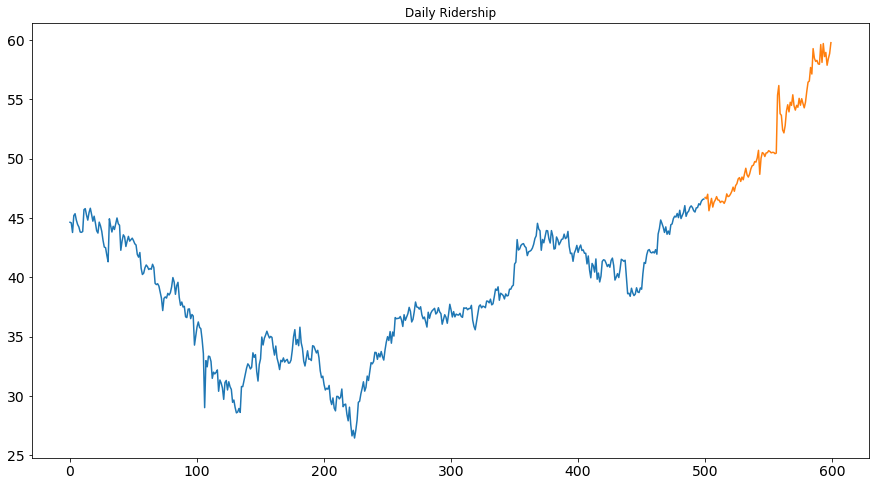

In [11]:
import matplotlib.pyplot as plt
#Строим график
train['Open'].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test['Open'].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

In [12]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

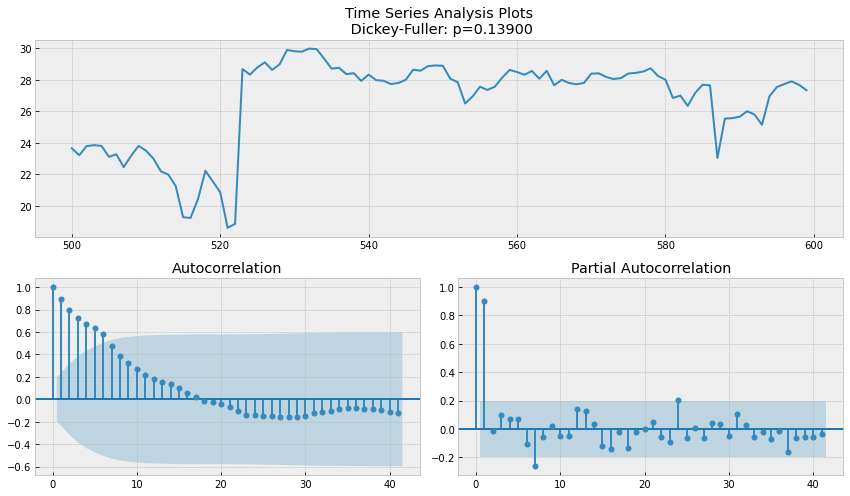

In [39]:
tsplot(test['Open'], lags=41)

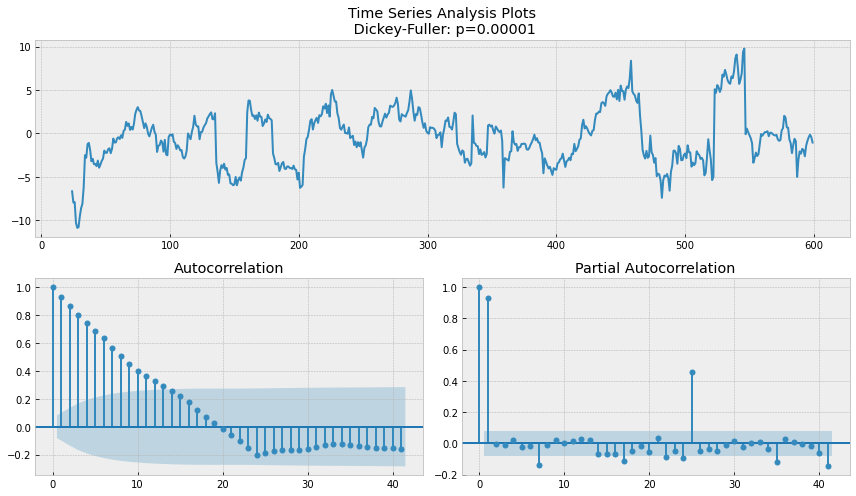

In [40]:
ads_diff = df['Open'] - df['Open'].shift(24)
tsplot(ads_diff[24:], lags=41)

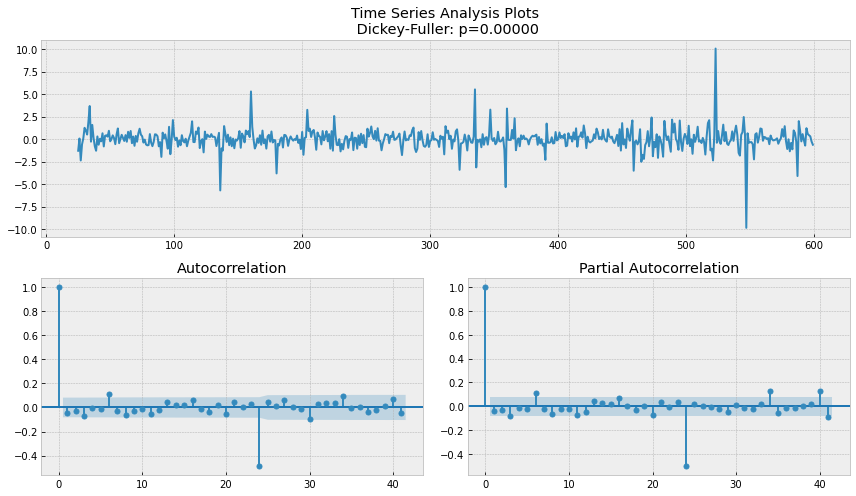

In [41]:
ads_diff = ads_diff - ads_diff.shift(1)
tsplot(ads_diff[24+1:], lags=41)

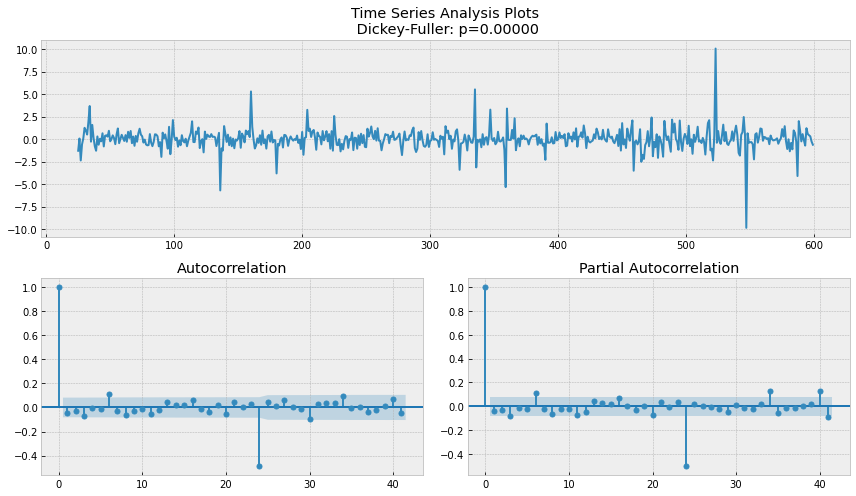

In [42]:
tsplot(ads_diff[24+1:], lags=41)

In [13]:
from itertools import product  
ps = range(2, 6)
#if((sum(df['GMV D-R'][61:90])>1.25*sum(df['GMV D-R'][0:29])) or ((sum(df['GMV D-R'][333:362])>2*sum(df['GMV D-R'][0:29])))):
#    d=1
#else:
#    d=0
d = 1 #range(0,2)
qs = range(2, 6)
Ps = range(0, 2)
D=1 
Qs = 1
s = 20 # season length is still 7

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps)
parameters_list = list(parameters)
len(parameters_list)

1

In [14]:
from tqdm import tqdm_notebook
def optimizeSARIMA(parameters_list, D,Qs, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            #print(parameters_list)
            model=sm.tsa.statespace.SARIMAX(df['Open'], order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, Qs, s)).fit(disp=-1)
        except:
            continue 
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

        #print(results)
    
    print(results)   
    result_table = pd.DataFrame(results)
    #result_table = result_table.reset_index()
    print(result_table)
    result_table.columns = ['parameters', 'aic']
    #result_table=result_table[['parameters', 'aic']]
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table


In [15]:
%%time
result_table = optimizeSARIMA(parameters_list, D,Qs, s)



[[(2, 2, 0), 1089.374619406344]]
           0            1
0  (2, 2, 0)  1089.374619
Wall time: 39 s


In [16]:
result_table.head(10)

,parameters,aic
0,"(2, 2, 0)",1089.374619


In [27]:
%%time
# set the parameters that give the lowest AIC
p, q, P = result_table.parameters[1]
best_model=sm.tsa.statespace.SARIMAX(df['Open'], order=(p, d, q), 
                                        seasonal_order=(P, D, Qs, 20)).fit(disp=-1)
print(best_model.summary())

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                 Open   No. Observations:                  500
Model:             SARIMAX(1, 2, 3)x(4, 1, [1], 20)   Log Likelihood                -536.305
Date:                              Wed, 01 Jun 2022   AIC                           1092.611
Time:                                      00:47:37   BIC                           1134.307
Sample:                                           0   HQIC                          1109.004
                                              - 500                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9994      0.047    -21.474      0.000      -1.091      -0.908
ma.L1         -0.16

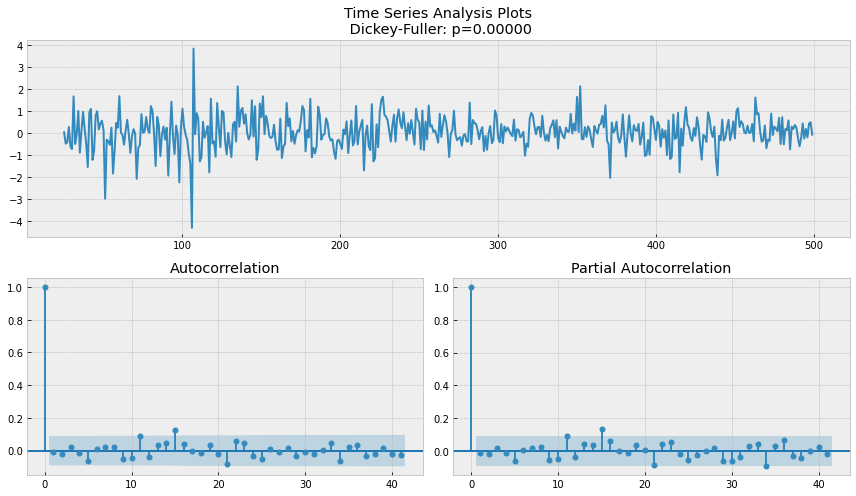

In [28]:
tsplot(best_model.resid[24+1:], lags=41)

In [18]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [33]:
import sklearn.metrics
#from sklearn.metrics import mean_absolute_percentage_error
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['col1','col2','actual']
    #data['actual'][600:720] = fb['Open'][600:720]
    #print(data['actual'] [700])
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][500:] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(df2['Open'][500:650], forecast[-150:])

    plt.figure(figsize=(15, 7))
    plt.title("Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(df2['Open'][:655], label="actual")
    plt.legend()
    
    #for i in forecast[:100]:
   #     print(i)
    """print("\n\n\nFact")
    print("April")
    for i in range(254,284):
        #print(f"Prediction on 04 {i-363} by SARIMA - {sum(forecast[i:i+1])}")
        #print(f"Fact on 04 {i-363} - {sum(data.actual[i:i+1])}")
        print(df['GMV D-R'][i]/1000000)
    print("May")
    for i in range(284,315):
        #print(f"Prediction on 05 {i-393} by SARIMA - {sum(forecast[i:i+1])}")
        #print(f"Fact on 05 {i-393} - {sum(data.actual[i:i+1])}")
        print(df['GMV D-R'][i]/1000000)"""
    
    #for i in range(100):
    #    print(forecast[i] - fb['Open'][600+i])
    plt.grid(True);


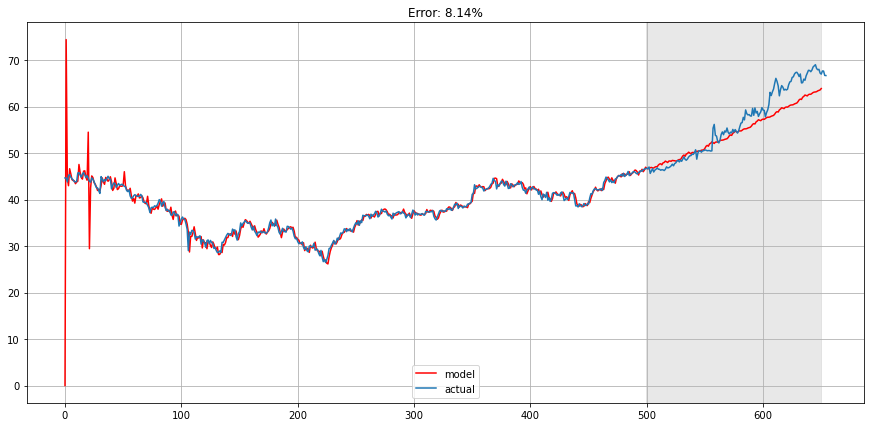

In [34]:
plotSARIMA(df, best_model, 150)

In [ ]:
if(sum(df['GMV D-R'][61:90])>1.3*sum(df['GMV D-R'][0:29])):
    d=1
else:
    d=0
print(d)